In [4]:
import pycaret
from pycaret.regression import *
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../modules/")

import time_series_CSV_reader as ts

import os
PROJECT_DIR = "ForecastCloudinJapan"
if os.getcwd().split("\\")[-1] == PROJECT_DIR:
    pass
else:
    os.chdir("../")

import pandas as pd
import japanize_matplotlib
import datetime as dt

In [7]:
csv_reader = ts.TimeSeriesCSVReader(2010)
df = csv_reader.load_data()

2022-12-31 00:00:00

In [12]:
df["日付"] = pd.to_datetime(df["日付"])
df_drop = df.drop(["日照時間","全天日射量","視程"],axis=1)
df_drop.head(2)
train = df_drop[df_drop["日付"] < dt.datetime(2020,1,1)]
test = df_drop[df_drop["日付"] > dt.datetime(2020,1,1)]

train.drop("日付",axis=1,inplace=True)
test.drop("日付",axis=1,inplace=True)

In [13]:
exp1 = setup(train,target="雲量")

,Description,Value
0,session_id,5161
1,Target,雲量
2,Original Data,"(87647, 14)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61352, 36)"


In [14]:
lgbm = create_model("lightgbm")
tuned_lgbm = tune_model(lgbm,optimize="MSE")
final_lgbm = finalize_model(tuned_lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9079,3.0613,1.7497,0.7749,0.4337,1.3935
1,0.9247,3.2784,1.8106,0.7570,0.4420,1.4176
2,0.9225,3.1663,1.7794,0.7661,0.4347,1.4037
3,0.9490,3.3031,1.8174,0.7593,0.4468,1.4479
4,0.9314,3.2071,1.7908,0.7700,0.4348,1.2925
5,0.9041,3.1037,1.7617,0.7609,0.4462,1.5051
6,0.8924,2.9691,1.7231,0.7788,0.4276,1.4015
7,0.8971,2.9429,1.7155,0.7854,0.4262,1.3845
8,0.9251,3.1867,1.7851,0.7619,0.4444,1.3590


In [15]:
final_lgbm

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=220, n_jobs=-1, num_leaves=90, objective=None,
              random_state=5161, reg_alpha=0.7, reg_lambda=0.5, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

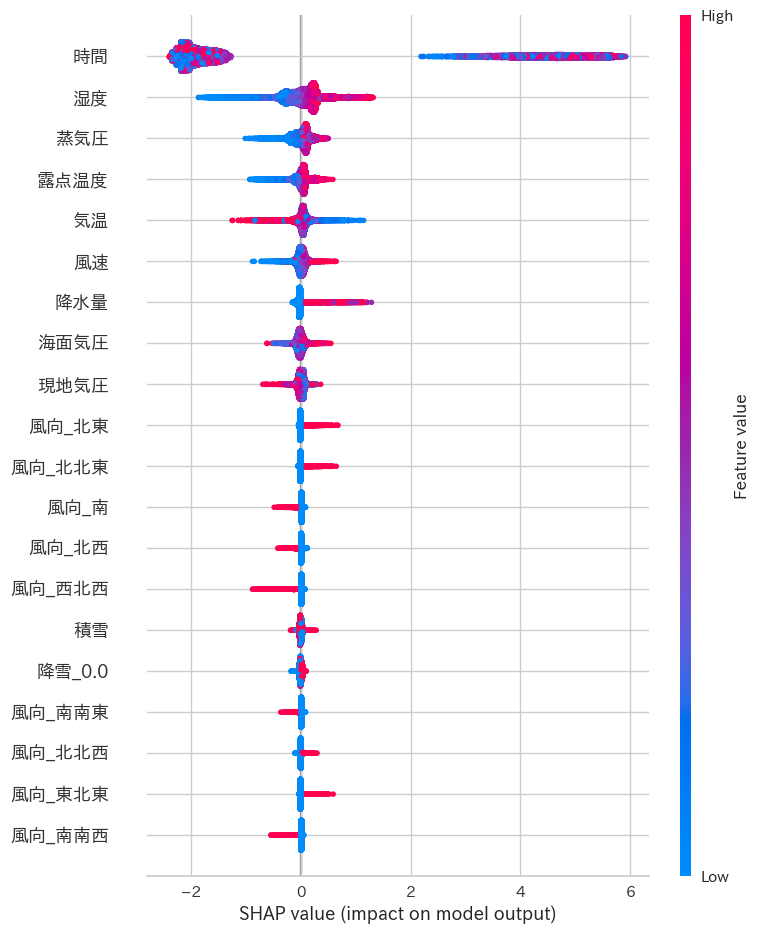

In [16]:
interpret_model(final_lgbm)

In [17]:
lgbm_pred = predict_model(final_lgbm,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.8269,2.6454,1.6265,0.8035,0.4118,1.3782


In [19]:
pred = predict_model(final_lgbm,data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.8695,3.0328,1.7415,0.7746,0.4359,1.6777


In [20]:
pred

,時間,現地気圧,海面気圧,降水量,気温,露点温度,蒸気圧,湿度,風速,風向,降雪,積雪,天気,雲量,Label
0,1,1016.7,1019.7,0.0,3.7,-7.7,3.4,43.0,6.0,北西,0.0,0.0,0,0.0,-0.313602
1,2,1016.9,1019.9,0.0,3.5,-7.9,3.4,43.0,4.3,北北西,0.0,0.0,0,0.0,0.115310
2,3,1017.1,1020.1,0.0,3.6,-7.5,3.5,44.0,4.8,北北西,0.0,0.0,0,4.0,4.420605
3,4,1017.4,1020.4,0.0,4.0,-7.4,3.5,43.0,4.7,北西,0.0,0.0,0,0.0,-0.056353
4,5,1017.7,1020.7,0.0,4.2,-7.3,3.5,43.0,4.2,北北西,0.0,0.0,0,0.0,0.029322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,1018.6,1021.6,0.0,5.7,0.5,6.3,69.0,1.4,北北西,0.0,0.0,0,0.0,-0.061945
20,21,1018.5,1021.5,0.0,4.9,0.7,6.4,74.0,1.0,北西,0.0,0.0,0,0.0,6.310575
21,22,1018.3,1021.3,0.0,3.8,0.9,6.5,81.0,0.9,南,0.0,0.0,0,0.0,-0.589267
22,23,1018.2,1021.2,0.0,4.8,0.6,6.4,74.0,2.6,西北西,0.0,0.0,0,0.0,-0.208526
